## 对数据进行初步分析与预处理

In [2]:
import pandas as pd
import numpy as np

# Load the data
programms = pd.read_csv('./dataset/summerOly_programs.csv')
print(programms.head())

      Sport         Discipline Code Sports Governing Body  1896  1900  1904  \
0  Aquatics  Artistic Swimming  SWA        World Aquatics     0     0     0   
1  Aquatics             Diving  DIV        World Aquatics     0     0     2   
2  Aquatics  Marathon Swimming  OWS        World Aquatics     0     0     0   
3  Aquatics           Swimming  SWM        World Aquatics     4     7     9   
4  Aquatics         Water Polo  WPO        World Aquatics     0     1     1   

   1906*  1908  1912  ...  1988  1992  1996  2000  2004  2008  2012  2016  \
0      0     0     0  ...   2.0   2.0   1.0   2.0   2.0   2.0   2.0   2.0   
1      1     2     4  ...   4.0   4.0   4.0   8.0   8.0   8.0   8.0   8.0   
2      0     0     0  ...   0.0   0.0   0.0   0.0   0.0   2.0   2.0   2.0   
3      4     6     9  ...  31.0  31.0  32.0  32.0  32.0  32.0  32.0  32.0   
4      0     1     1  ...   1.0   1.0   1.0   2.0   2.0   2.0   2.0   2.0   

   2020  2024  
0   2.0   2.0  
1   8.0   8.0  
2   2.0   2.0 

In [34]:
TotalEvents = programms.iloc[-3][4:]
print(TotalEvents)

1896        43
1900        97
1904        95
1906*       76
1908       110
1912       102
1920       156
1924     126.0
1928     109.0
1932     117.0
1936     129.0
1948     136.0
1952     149.0
1956     151.0
1960     150.0
1964     163.0
1968     172.0
1972     195.0
1976     198.0
1980     203.0
1984     221.0
1988     237.0
1992     257.0
1996     271.0
2000     300.0
2004     301.0
2008     302.0
2012     302.0
2016     306.0
2020     339.0
2024     329.0
Name: 71, dtype: object


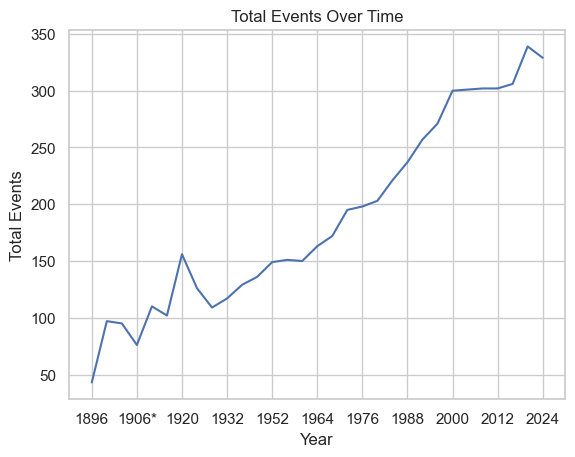

In [37]:
# 绘制total events随时间变化的折线图

import matplotlib.pyplot as plt

plt.plot(TotalEvents)
plt.xlabel('Year')
plt.ylabel('Total Events')
plt.title('Total Events Over Time')
plt.xticks(np.arange(0, len(TotalEvents), step=3))
plt.show()

In [55]:
import pandas as pd

df = pd.read_csv('./dataset/summerOly_athletes.csv')
df = df[df['Medal'] != 'No medal']
result = df.groupby(['Year', 'NOC', 'Sport', 'Medal']).size().unstack(fill_value=0)
gold_results = result.get('Gold', 0)
total_results = result.sum(axis=1)

final_results = pd.DataFrame({
    'Gold': gold_results,
    'Total': total_results
})

result = final_results
print(result)

                        Gold  Total
Year NOC Sport                     
1896 AUS Athletics         2      2
         Tennis            0      1
     AUT Cycling           1      3
         Swimming          1      2
     DEN Fencing           0      1
...                      ...    ...
2024 UZB Judo              1      3
         Taekwondo         1      2
         Weightlifting     0      1
         Wrestling         1      2
     ZAM Athletics         0      1

[6745 rows x 2 columns]


In [116]:
df = pd.read_csv("./dataset/summerOly_programs.csv")
    # 统计每届奥运会各个运动项目的event数量
df_filtered = df[['Discipline'] + list(df.columns[4:])]
print(df_filtered.iloc[:55, 0:].tail())

        Discipline  1896  1900  1904  1906*  1908  1912  1920  1924  1928  \
50    Motorboating     0     0     0      0     3     0     0   0.0   0.0   
51   Weightlifting     2     2     2      0     0     0     5   5.0   5.0   
52       Wrestling     1     0     7      4     9     5    10  13.0  13.0   
53  Figure Skating     0     0     0      0     4     0     3   NaN   NaN   
54      Ice Hockey     0     0     0      0     0     0     1   NaN   NaN   

    ...  1988  1992  1996  2000  2004  2008  2012  2016  2020  2024  
50  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
51  ...  10.0  10.0  10.0  15.0  15.0  15.0  15.0  15.0  14.0  10.0  
52  ...  20.0  20.0  20.0  16.0  18.0  18.0  18.0  18.0  18.0  18.0  
53  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
54  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 32 columns]


In [68]:
print(df_filtered.loc[0][str(1904)])

0


In [81]:
import pickle

In [88]:
with open('./dataset/probability_matrices.pkl', 'rb') as f:
    probability_matices = pickle.load(f)

In [90]:
print(probability_matices.keys())

dict_keys([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020, 2024])


In [77]:
stable_countries = [
    "AUS", "BRA", "CAN", "DEN", "FIN", "FRA", "GER", "GBR", 
    "HUN", "IRI", "ITA", "JPN", "NED", "NZL", "KOR", "ESP", 
    "USA", "CHN"
]

# 筛选这些国家2020年的概率矩阵
stable_countries_probability_2020 = probability_matices[2020].loc[stable_countries]
stable_countries_probability_2024 = probability_matices[2024].loc[stable_countries]
stable_countries_probability_2020 = stable_countries_probability_2020.apply(pd.to_numeric, errors='coerce').fillna(0)
stable_countries_probability_2024 = stable_countries_probability_2024.apply(pd.to_numeric, errors='coerce').fillna(0)
print(stable_countries_probability_2020)

     Artistic Swimming  Diving  Marathon Swimming  Swimming  Water Polo  \
AUS                0.0   0.000                0.0  0.257143         0.0   
BRA                0.0   0.000                0.5  0.000000         0.0   
CAN                0.0   0.000                0.0  0.028571         0.0   
DEN                0.0   0.000                0.0  0.000000         0.0   
FIN                0.0   0.000                0.0  0.000000         0.0   
FRA                0.0   0.000                0.0  0.000000         0.0   
GER                0.0   0.000                0.5  0.000000         0.0   
GBR                0.0   0.125                0.0  0.114286         0.0   
HUN                0.0   0.000                0.0  0.028571         0.0   
IRI                0.0   0.000                0.0  0.000000         0.0   
ITA                0.0   0.000                0.0  0.000000         0.0   
JPN                0.0   0.000                0.0  0.057143         0.0   
NED                0.0   

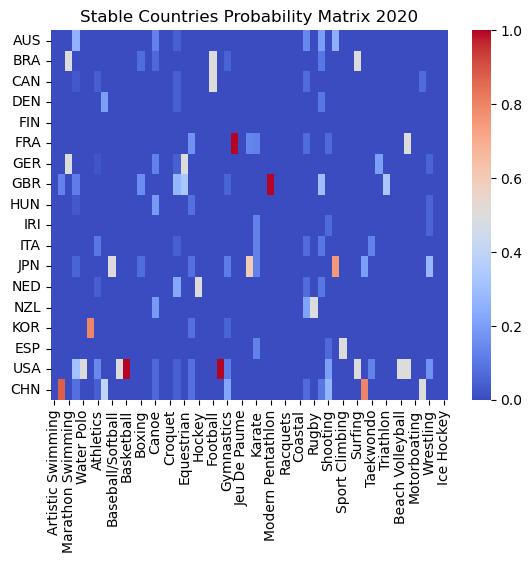

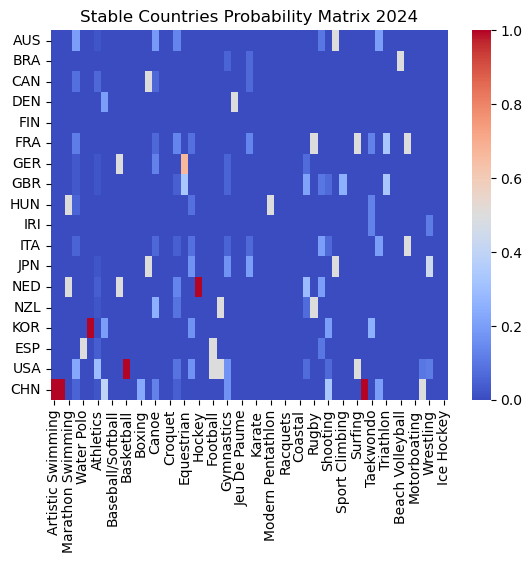

In [79]:
# 绘制两年的概率矩阵的热力图
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(stable_countries_probability_2020, cmap='coolwarm')
plt.title('Stable Countries Probability Matrix 2020')
plt.show()

sns.heatmap(stable_countries_probability_2024, cmap='coolwarm')
plt.title('Stable Countries Probability Matrix 2024')
plt.show()



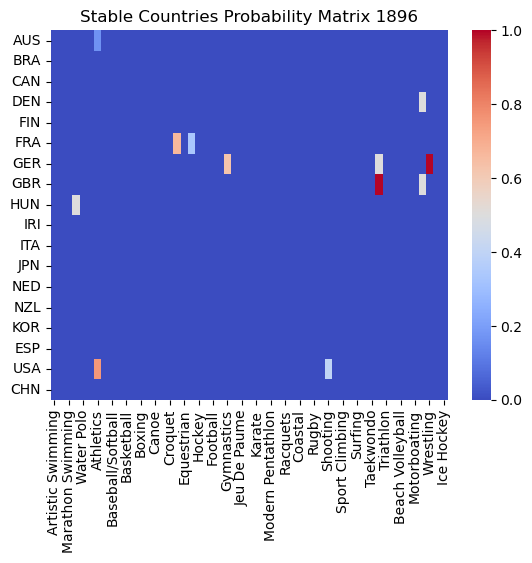

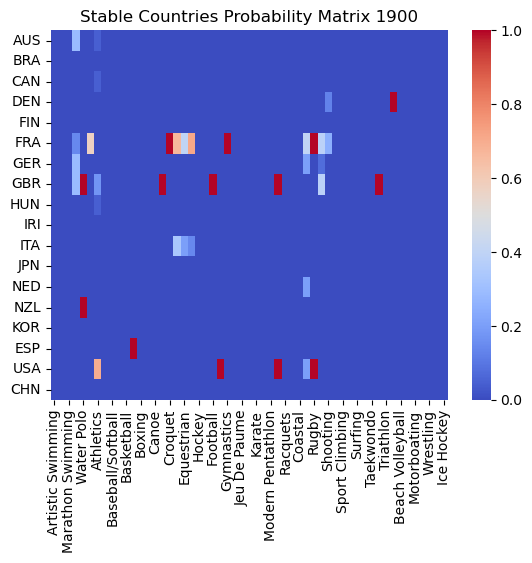

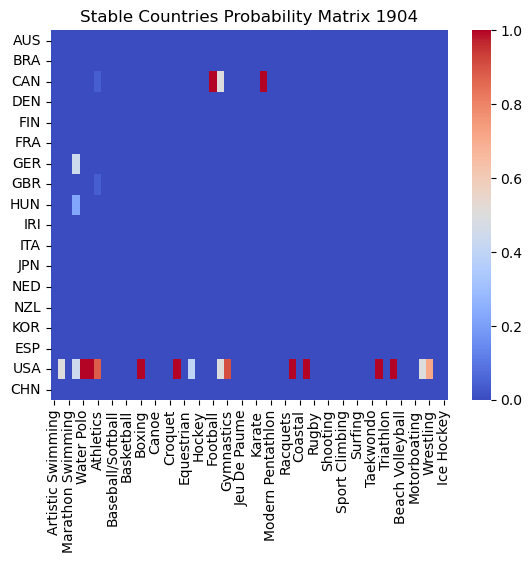

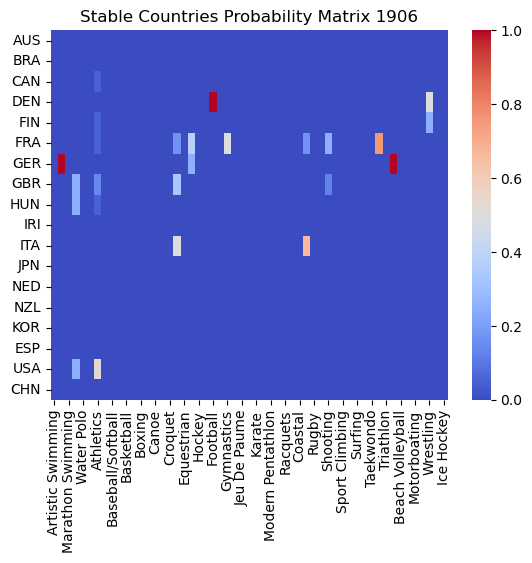

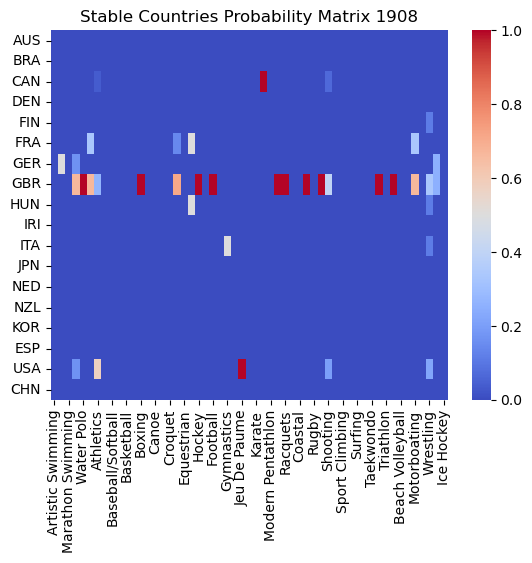

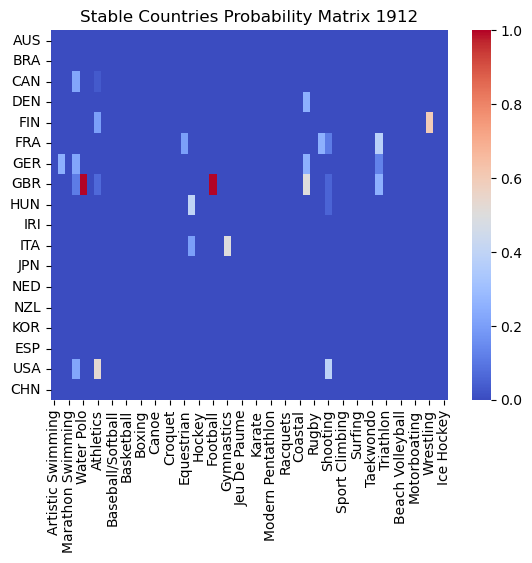

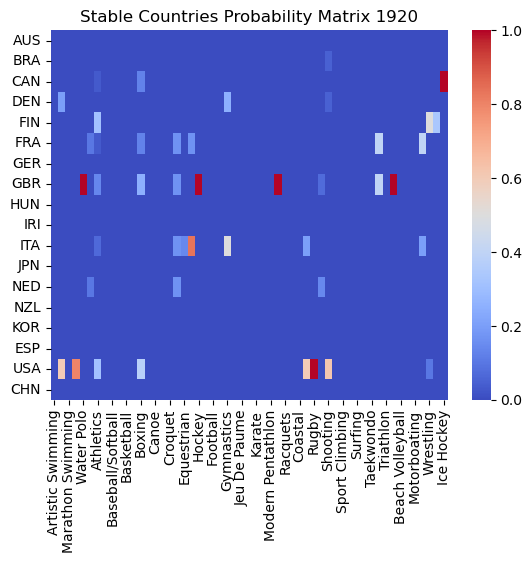

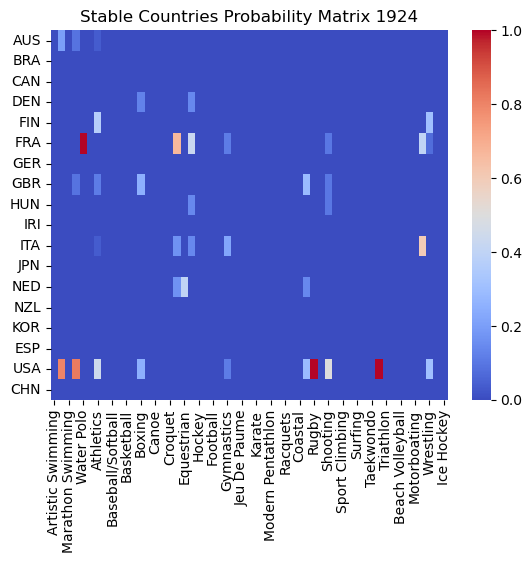

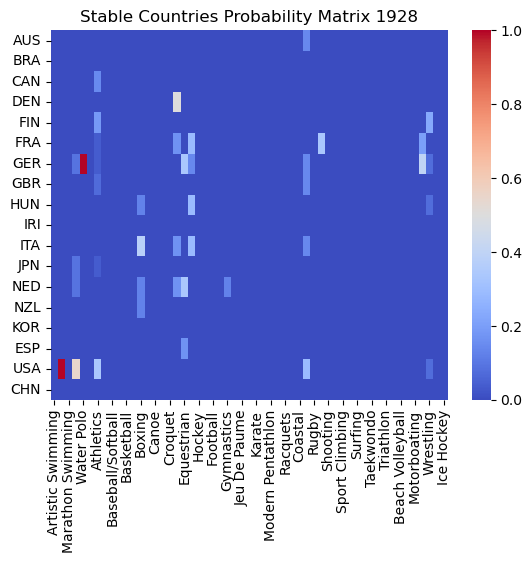

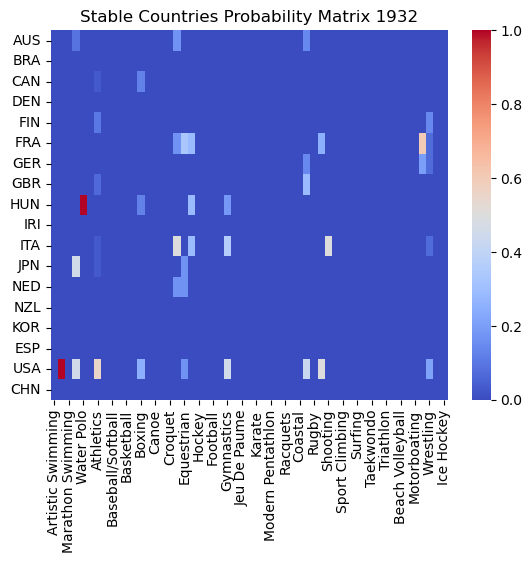

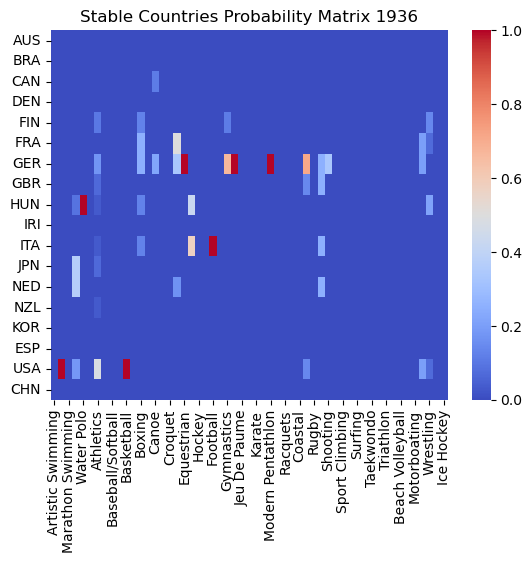

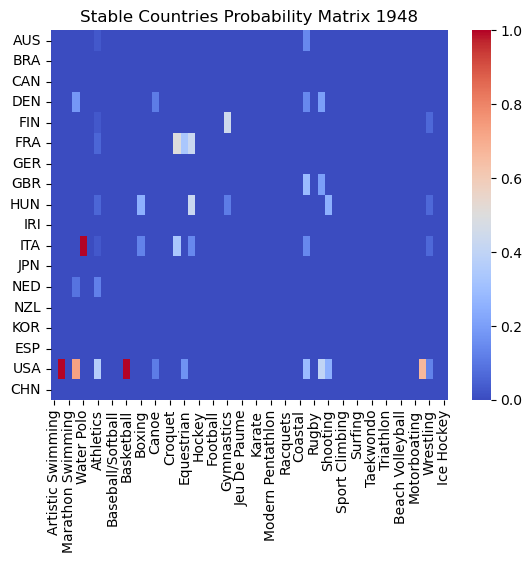

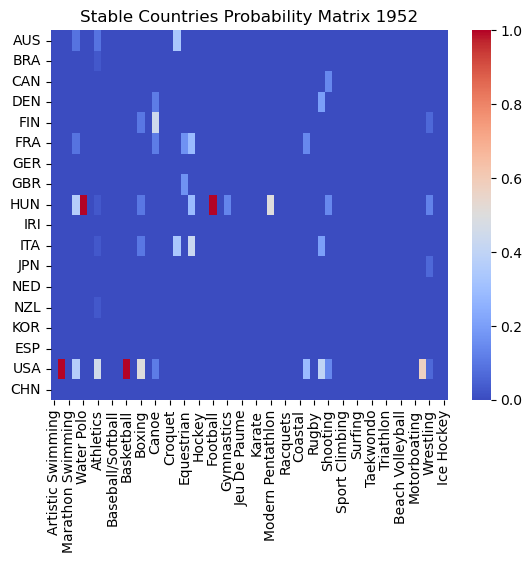

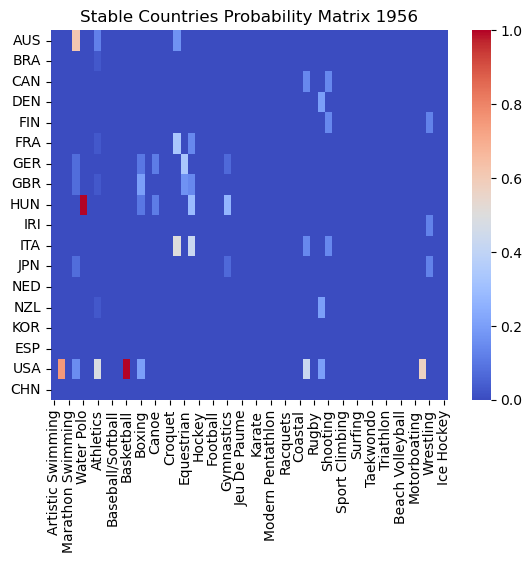

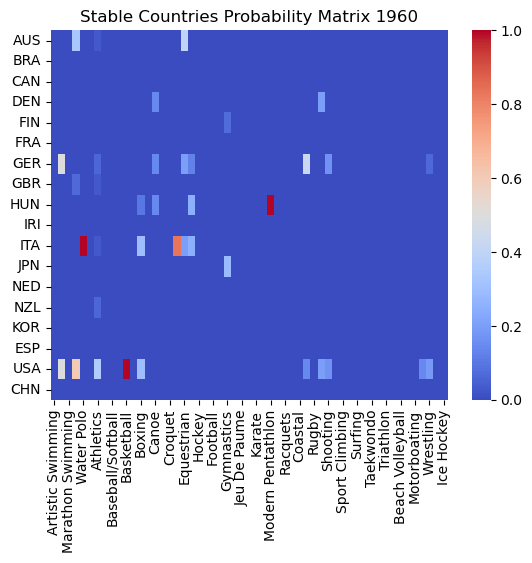

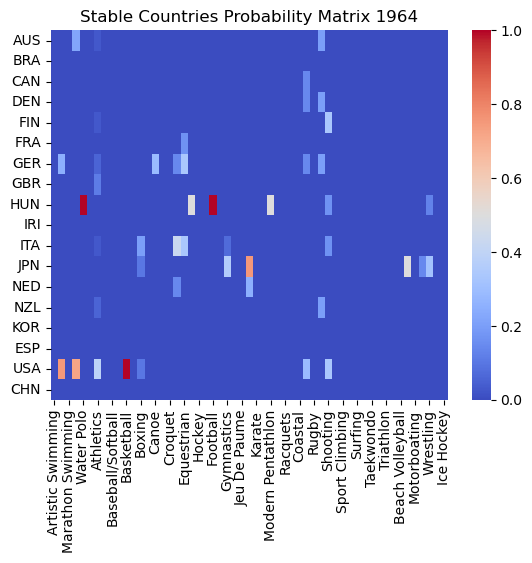

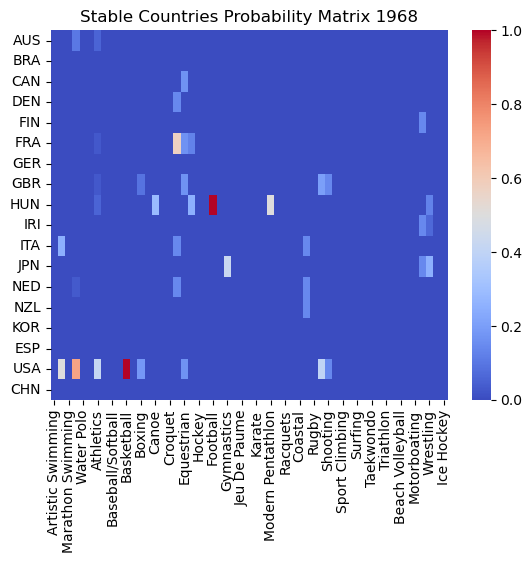

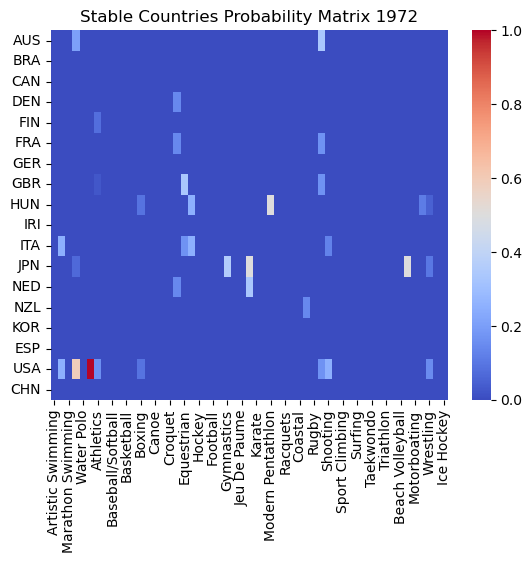

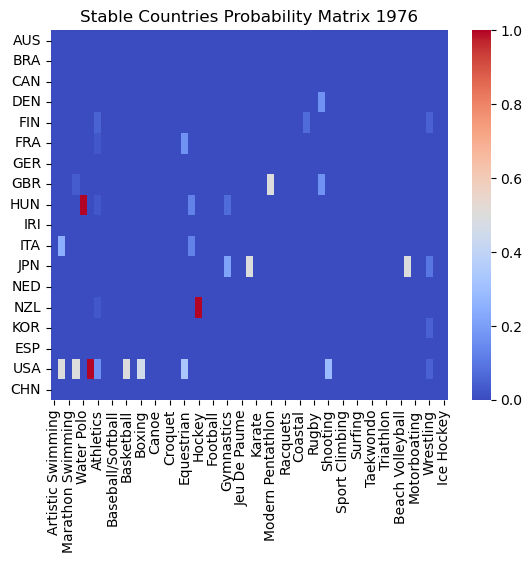

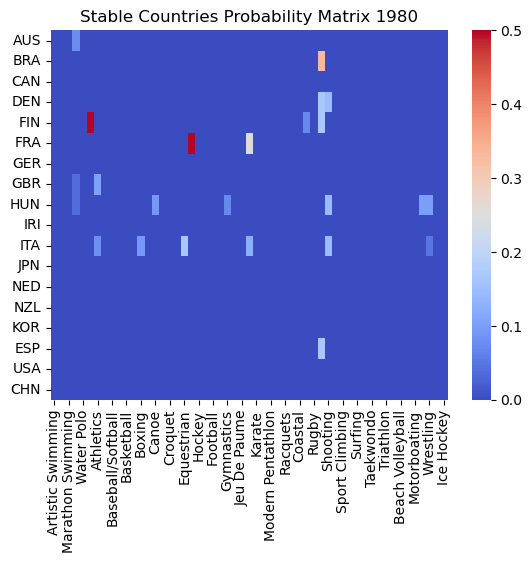

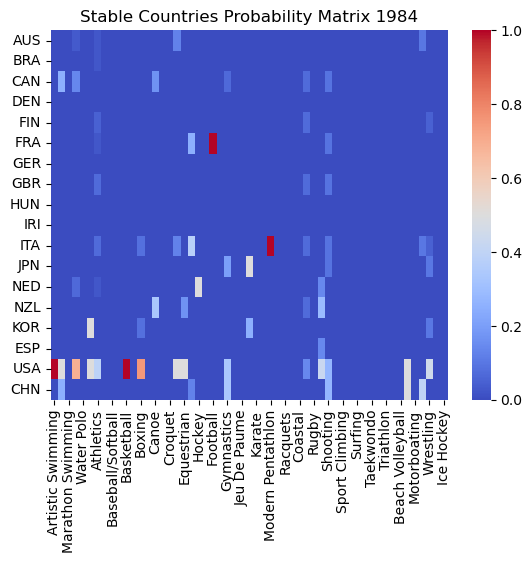

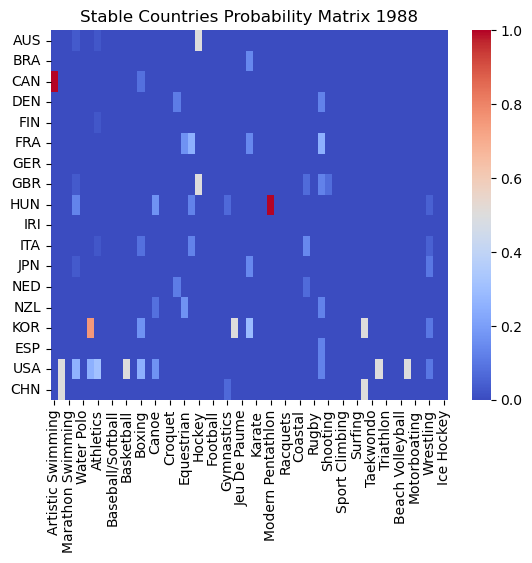

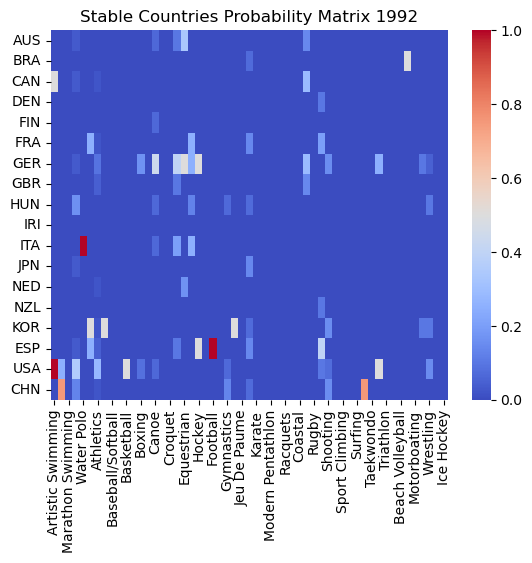

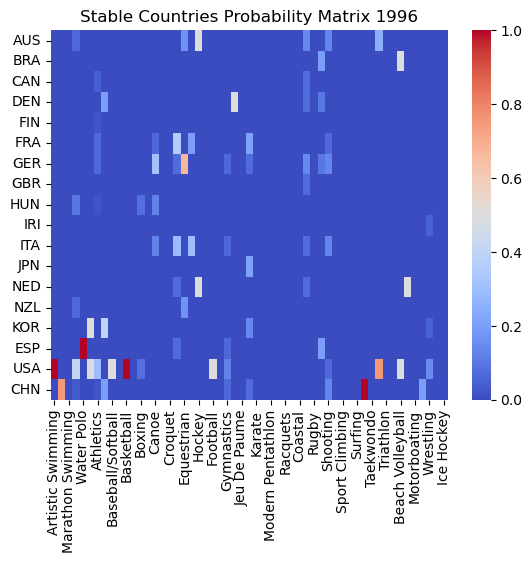

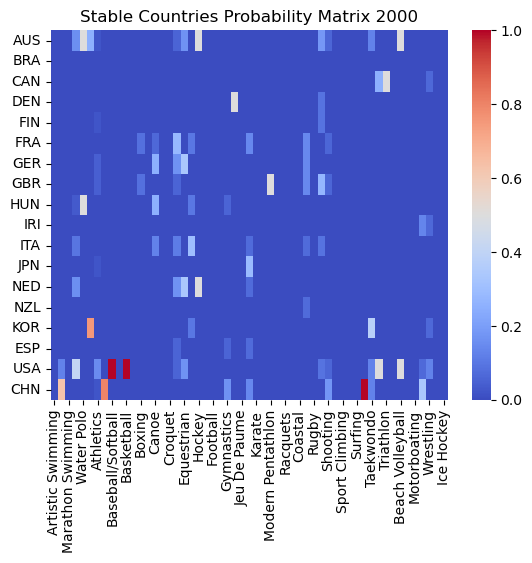

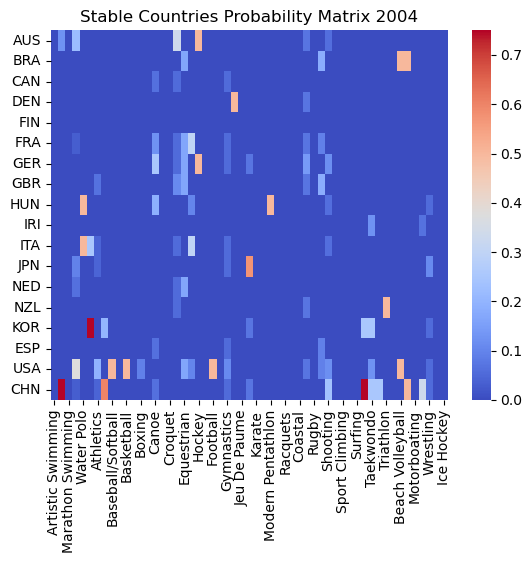

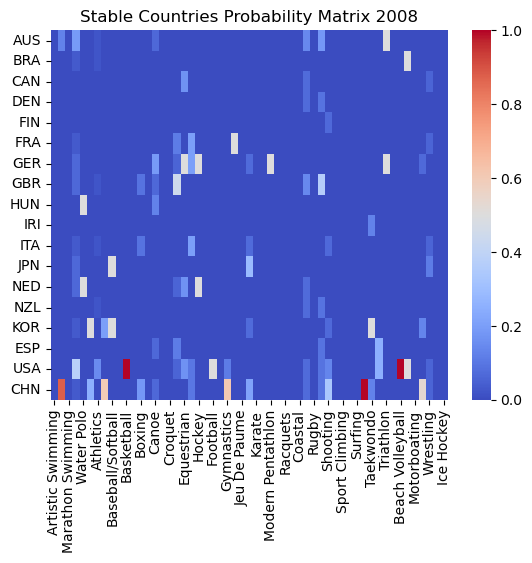

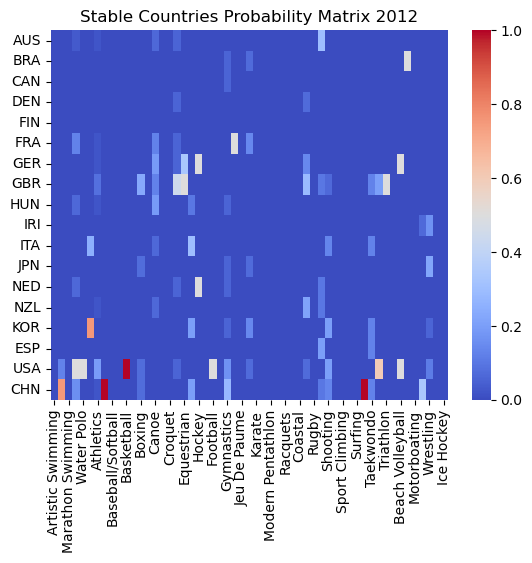

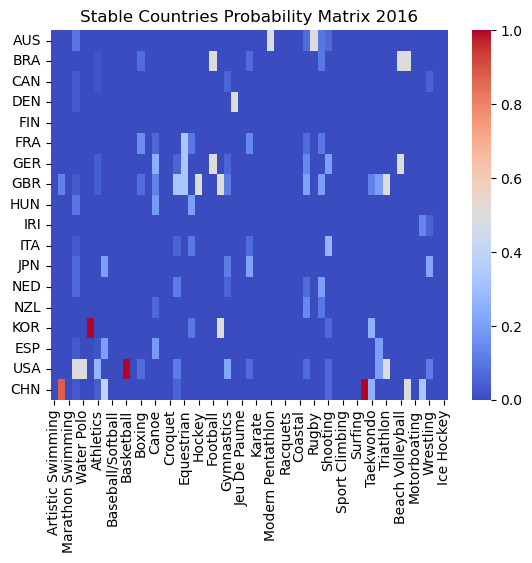

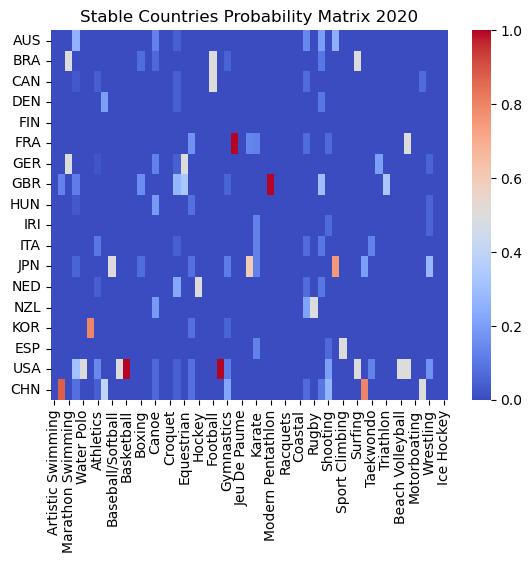

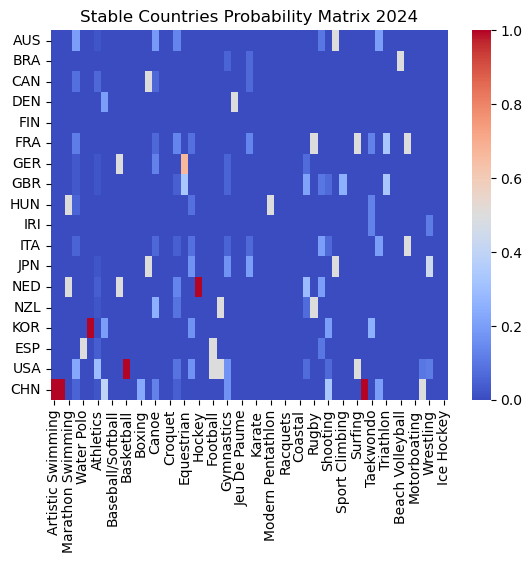

In [92]:
stable_countries = [
    "AUS", "BRA", "CAN", "DEN", "FIN", "FRA", "GER", "GBR", 
    "HUN", "IRI", "ITA", "JPN", "NED", "NZL", "KOR", "ESP", 
    "USA", "CHN"
]

# 筛选这些国家每年的概率矩阵
stable_countries_probability = {}
for year in probability_matices.keys():
    stable_countries_probability[year] = probability_matices[year].loc[stable_countries]
    stable_countries_probability[year] = stable_countries_probability[year].apply(pd.to_numeric, errors='coerce').fillna(0)

# 绘制这些国家每年的概率矩阵的热力图
for year in stable_countries_probability.keys():
    sns.heatmap(stable_countries_probability[year], cmap='coolwarm')
    plt.title(f'Stable Countries Probability Matrix {year}')
    plt.show()

    # 保存至csv文件
    stable_countries_probability[year].to_csv(f'./output/stable_countries_probability_{year}.csv')

In [29]:
import pickle

In [37]:
with open('./dataset/number_matrices.pkl', 'rb') as f:
    number_matices = pickle.load(f)

In [39]:
print(number_matices[2024])

    Artistic Swimming Diving Marathon Swimming Swimming Water Polo Archery  \
AFG               0.0    0.0               0.0      1.0        0.0     0.0   
AHO                 0      0                 0        0          0       0   
AIN               0.0    0.0               0.0      7.0        0.0     0.0   
ALB               0.0    0.0               0.0      2.0        0.0     0.0   
ALG               0.0    0.0               0.0      2.0        0.0     0.0   
..                ...    ...               ...      ...        ...     ...   
YEM               0.0    0.0               0.0      1.0        0.0     0.0   
YMD                 0      0                 0        0          0       0   
YUG                 0      0                 0        0          0       0   
ZAM               0.0    0.0               0.0      2.0        0.0     0.0   
ZIM               0.0    0.0               0.0      2.0        0.0     0.0   

    Athletics Badminton Baseball/Softball  3x3  ... Tennis Tria

In [27]:
df = pd.read_csv('./dataset/summerOly_athletes.csv')
result = df.groupby(['Year', 'NOC', 'Sport']).size()

# 转换为字典，key为年份，value为dataframe，index为国家，columns为体育项目
result = result.unstack(level=-1)
result = result.fillna(0)

In [28]:
print(result.loc[(2016, 'AFG')].index)

Index(['3x3', 'Archery', 'Artistic Swimming', 'Athletics', 'Badminton',
       'Baseball/Softball', 'Basketball', 'Basque Pelota', 'Beach Volleyball',
       'Boxing', 'Breaking', 'Canoe', 'Cricket', 'Croquet', 'Cycling',
       'Cycling, Cycling', 'Cycling, Triathlon', 'Diving', 'Equestrian',
       'Fencing', 'Figure Skating', 'Football', 'Golf', 'Gymnastics',
       'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo', 'Karate',
       'Lacrosse', 'Marathon Swimming', 'Marathon Swimming, Swimming',
       'Modern Pentathlon', 'Motorboating', 'Polo', 'Racquets', 'Roque',
       'Rowing', 'Rugby', 'Sailing', 'Shooting', 'Skateboarding',
       'Sport Climbing', 'Surfing', 'Swimming', 'Table Tennis', 'Taekwondo',
       'Tennis', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo',
       'Weightlifting', 'Wrestling'],
      dtype='object', name='Sport')


In [43]:
df = pd.read_csv('./dataset/summerOly_programs.csv')
df_filtered = df[['Discipline'] + list(df.columns[4:])]
df_filtered = df_filtered.iloc[:55, 0:]
df_filtered.rename(columns={'1906*': '1906'}, inplace = True)
df_filtered = df_filtered.set_index('Discipline')
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce').fillna(0)
print(df_filtered)

# 保存到csv文件

                   1896  1900  1904  1906  1908  1912  1920  1924  1928  1932  \
Discipline                                                                      
Artistic Swimming     0     0     0     0     0     0     0   0.0   0.0   0.0   
Diving                0     0     2     1     2     4     5   5.0   4.0   4.0   
Marathon Swimming     0     0     0     0     0     0     0   0.0   0.0   0.0   
Swimming              4     7     9     4     6     9    10  11.0  11.0  11.0   
Water Polo            0     1     1     0     1     1     1   1.0   1.0   1.0   
Archery               0     7     6     0     3     0    10   0.0   0.0   0.0   
Athletics            12    23    25    21    26    30    29  27.0  27.0  29.0   
Badminton             0     0     0     0     0     0     0   0.0   0.0   0.0   
Baseball/Softball     0     0     0     0     0     0     0   0.0   0.0   0.0   
3x3                   0     0     0     0     0     0     0   0.0   0.0   0.0   
Basketball            0     

In [54]:
df_1 = pd.read_excel('./dataset/Medal_Team_Individual.xlsx', sheet_name='金牌')
df_2 = pd.read_excel('./dataset/Medal_Team_Individual.xlsx', sheet_name='总奖牌数')

In [55]:
print(df_1)

      NOC  Year  Gold Medals_3x3 Basketball  \
0     AFG  1936                           0   
1     NaN  1948                           0   
2     NaN  1956                           0   
3     NaN  1960                           0   
4     NaN  1964                           0   
...   ...   ...                         ...   
3217  NaN  2008                           0   
3218  NaN  2012                           0   
3219  NaN  2016                           0   
3220  NaN  2020                           0   
3221  NaN  2024                           0   

      Gold Medals_3x3 Basketball, Basketball  Gold Medals_Aeronautics  \
0                                          0                        0   
1                                          0                        0   
2                                          0                        0   
3                                          0                        0   
4                                          0                        0 

In [71]:
df_1['Gold Medals_Marathon Swimming'] = df_1['Gold Medals_Marathon Swimming'] + df_1['Gold Medals_Marathon Swimming, Swimming']
df_1 = df_1.drop(columns=['Gold Medals_Marathon Swimming, Swimming'])

In [72]:
print(df_1.columns)

Index(['NOC', 'Year', 'Gold Medals_Archery', 'Gold Medals_Artistic Gymnastics',
       'Gold Medals_Artistic Swimming', 'Gold Medals_Athletics',
       'Gold Medals_Badminton', 'Gold Medals_Baseball/Softball',
       'Gold Medals_Basketball', 'Gold Medals_Basque Pelota',
       'Gold Medals_Beach Volleyball', 'Gold Medals_Boxing',
       'Gold Medals_Breaking', 'Gold Medals_Cricket', 'Gold Medals_Croquet',
       'Gold Medals_Cycling', 'Gold Medals_Diving', 'Gold Medals_Equestrian',
       'Gold Medals_Fencing', 'Gold Medals_Figure Skating',
       'Gold Medals_Football', 'Gold Medals_Golf', 'Gold Medals_Gymnastics',
       'Gold Medals_Handball', 'Gold Medals_Hockey', 'Gold Medals_Ice Hockey',
       'Gold Medals_Jeu De Paume', 'Gold Medals_Judo', 'Gold Medals_Karate',
       'Gold Medals_Lacrosse', 'Gold Medals_Marathon Swimming',
       'Gold Medals_Modern Pentathlon', 'Gold Medals_Motorboating',
       'Gold Medals_Polo', 'Gold Medals_Racquets',
       'Gold Medals_Rhythmic Gymnast

In [59]:
df_1 = df_1.drop(columns=['Gold Medals_Aeronautics','Gold Medals_Alpinism','Gold Medals_Art Competitions'])

In [73]:
df = pd.read_csv('./dataset/summerOly_athletes.csv')
df = df[df['Medal'] != 'No medal']
result = df.groupby(['Year', 'NOC', 'Sport', 'Event', 'Medal']).size().unstack(fill_value=0)
result = result.dropna(axis=0)
gold_results = result.get('Gold', 0)
total_results = result.sum(axis=1)

final_results = pd.DataFrame({
    'Gold': gold_results,
    'Total': total_results
})

print(final_results)

                                                 Gold  Total
Year NOC Sport     Event                                    
1896 AUS Athletics Athletics Men's 1,500 metres     1      1
                   Athletics Men's 800 metres       1      1
         Tennis    Tennis Men's Doubles             0      1
     AUT Cycling   Cycling Men's 10,000 metres      0      1
                   Cycling Men's 12-Hours Race      1      1
...                                               ...    ...
2024 CPV Boxing    Men's 51kg                       0      1
     DMA Athletics Women's Triple Jump              1      1
     EOR Boxing    Women's 75kg                     0      1
     LCA Athletics Women's 100m                     1      1
                   Women's 200m                     0      1

[16141 rows x 2 columns]


In [96]:
import dataprocess
import numpy as np
programms_num_2028 = dataprocess.get_programms_num().iloc[:, -1].to_numpy()
programms_num_2028 = np.nan_to_num(programms_num_2028)
print(programms_num_2028)

[ 2.  8.  2. 35.  2.  5. 48.  5.  2.  2.  2.  0.  0.  0. 16.  2.  0. 22.
  6. 12.  2.  2.  2.  2. 18.  2.  0. 15.  0.  2.  2.  0.  0.  0.  3. 12.
  2. 10. 15.  4.  4.  2.  2.  5.  8.  5.  3.  0.  2.  2.  0. 10. 18.  0.
  0.]
